In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta, date
from matplotlib.patches import Polygon

# define colors
lakecolor = '#ca3e3dff' 
marinecolor = '#46556aff'
background = '#f8f6f4ff'

 Read Lake Terminus

In [ ]:
LT1 = pd.read_csv(r"...\3.1_glacier_margins_and_flowline\LT1_margins.csv", 
                      skiprows=2,
                      names = ["year", "month", "day", "serial_date", "pos_flowline", "pos_rel", "change","change_rate", "terminus_width", "path_length", "node_distance", "box_width", "box_area"]
                      )

LT1['date'] = pd.to_datetime(LT1['year'].astype(str) + '-' + LT1['month'].astype(str) + '-' + LT1['day'].astype(str))
LT1.index = LT1['date']
LT1.sort_index(inplace = True)
LT1['pos_rel_inv'] = (((LT1['pos_rel'] - LT1['pos_rel'].iloc[2])*(-1))/1000)
LT1['dayofyear'] = LT1.date.dt.dayofyear 

Read Marine Terminus

In [ ]:
MT = pd.read_csv(r"...\3.1_glacier_margins_and_flowline\MT_margins.csv", 
                      skiprows=2,
                      names = ["year", "month", "day", "serial_date", "pos_flowline", "pos_rel", "change","change_rate", "terminus_width", "path_length", "node_distance", "box_width", "box_area"]
                      )

MT['date'] = pd.to_datetime(MT['year'].astype(str) + '-' + MT['month'].astype(str) + '-' + MT['day'].astype(str))
MT.index = pd.to_datetime(MT['date'])
MT.sort_index(inplace = True)
MT['pos_rel_inv'] = (((MT['pos_rel'] - MT['pos_rel'].iloc[3])*(-1))/1000)
MT['dayofyear'] = MT.date.dt.dayofyear 


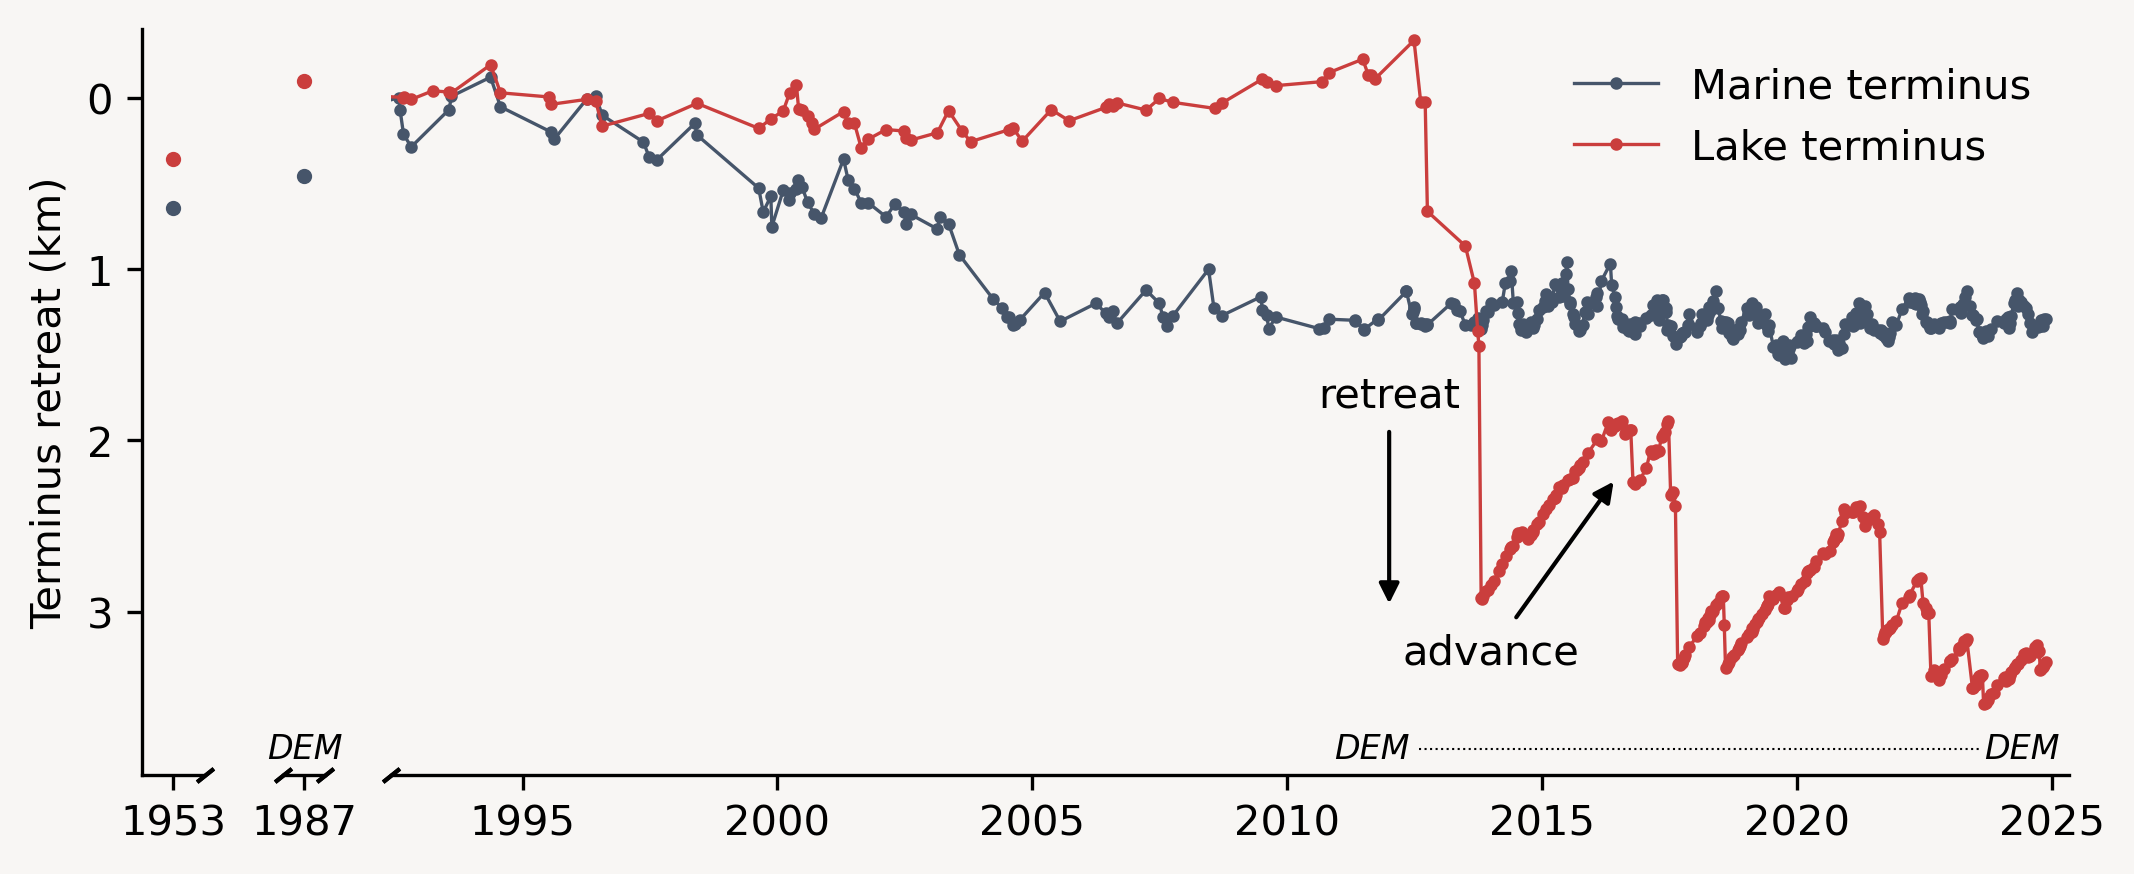

In [ ]:
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(7, 2.8), dpi=300, gridspec_kw=dict(width_ratios=[1,1,40], ), sharex=False, facecolor=background, layout="constrained")

# figure formatting
ax.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)

# data plotting axis 0
ax.scatter(MT.index, MT.pos_rel_inv, marker = 'o', s= 10, linewidth= 0.5, zorder = 2, color = marinecolor, label = 'Marine terminus')
ax.scatter(LT1.index, LT1.pos_rel_inv, marker = 'o', s= 10, linewidth=0.5, color = lakecolor , label = 'Lake terminus')

# data plotting axis 1
ax1.scatter(MT.index, MT.pos_rel_inv, marker = 'o', s= 10, linewidth= 0.5, zorder = 2, color = marinecolor, label = 'Marine terminus')
ax1.scatter(LT1.index, LT1.pos_rel_inv, marker = 'o', s= 10, linewidth=0.5, color = lakecolor , label = 'Lake terminus')

# data plotting axis 2
ax2.plot(MT.index, MT.pos_rel_inv, marker = 'o', markersize= 2, linewidth= 0.8, zorder = 2, color = marinecolor, label = 'Marine terminus')
ax2.plot(LT1.index, LT1.pos_rel_inv, marker = 'o', markersize= 2, linewidth=0.8, color = lakecolor , label = 'Lake terminus')


# axis formatting
ax.invert_yaxis()
ax1.invert_yaxis()
ax2.invert_yaxis()

ax.set_xlim(date(1952, 10, 1), date(1953, 2, 2))
ax1.set_xlim(date(1986, 10, 1), date(1987, 4, 1))
ax2.set_xlim(date(1992, 6, 1), date(2025, 5, 1))

ax.set_ylim(3.95, -0.4)
ax1.set_ylim(3.95, -0.4)
ax2.set_ylim(3.95, -0.4)

ax.spines.bottom.set_bounds(mdates.date2num(date(1952, 10, 1)), mdates.date2num(date(1953, 4, 2)))

ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax2.xaxis.set_major_locator(mdates.YearLocator(5))

ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax1.yaxis.set_major_locator(plt.MultipleLocator(1))
ax2.yaxis.set_major_locator(plt.MultipleLocator(1))

ax.set_ylabel('Terminus retreat (km)', fontsize = 10)

# axis break
d = 0.8  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=4,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([1.5, 1.5], [0, 0], transform=ax.transAxes, **kwargs)
ax1.plot([0, 0], [0, 0], transform=ax1.transAxes, **kwargs)
ax1.plot([1, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [0, 0], transform=ax2.transAxes, **kwargs)

# Spines
ax.spines[['right', 'top', 'right']].set_visible(False)
ax1.spines[['left', 'top', 'right']].set_visible(False)
ax2.spines[['left', 'top', 'right']].set_visible(False)

ax.tick_params(right = False,
                labelright= False,
                labelsize = 10)
ax1.tick_params(left = False,
                right = False ,
                labelright = False,
                labelleft = False,
                labelsize = 10)
ax2.tick_params(left = False,
                right = False ,
                labelright = False,
                labelleft = False,
                labelsize = 10)

#annotations
#ax2.add_patch(plt.Rectangle((mdates.date2num(date(2013, 8, 1)), 3.6), mdates.date2num(date(1981, 9, 1)), -1.8, ls="dotted", lw=0.8, ec="none", fc="gray", alpha=0.15))
#ax2.add_patch(plt.Rectangle((mdates.date2num(date(2004, 1, 1)), 1.6), mdates.date2num(date(1991, 2, 1)), -0.7, ls="dotted", lw=0.8, ec="none", fc="gray", alpha=0.15))

ax2.annotate('retreat',
            (mdates.date2num(date(2012, 1, 1)), 3),
            xytext=(mdates.date2num(date(2012, 1, 1)), 1.8),
            ha='center', fontsize=10, arrowprops=dict(arrowstyle='-|>', facecolor='k'))

ax2.annotate('advance',
            (mdates.date2num(date(2016, 7, 1)), 2.2),
            xytext=(mdates.date2num(date(2013, 12, 31)), 3.3),
            ha='center', fontsize=10, arrowprops=dict(arrowstyle='-|>', facecolor='k'))

ax1.annotate('DEM', xy=(mdates.date2num(date(1987, 1, 1)), 3.85), fontsize = 8, ha='center', style='italic')
ax2.annotate('DEM', xy=(mdates.date2num(date(2011, 9, 1)), 3.85), fontsize = 8, ha='center', style='italic')
ax2.annotate('DEM', xy=(mdates.date2num(date(2024, 6, 1)), 3.85), fontsize = 8, ha='center', style='italic')

ax2.legend(loc = 'upper right', fontsize = 10, frameon = False)

#plt.savefig(r"path", dpi = 300)	